<a href="https://colab.research.google.com/github/LatiefDataVisionary/machine-learning-basic-dicoding/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Lathif_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Tambahkan library lain sesuai kebutuhan

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
df = pd.read_table('/content/drive/MyDrive/Project Machine Learning Dicoding/marketing_campaign.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


**Judul Dataset   : Customer Personality Analysis**

**Link Dataset**    : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Dataset Analisis Kepribadian Pelanggan (***Customer Personality Analysis***) adalah analisis terperinci tentang pelanggan ideal suatu perusahaan. Analisis ini membantu bisnis untuk lebih memahami pelanggannya dan memudahkan mereka untuk memodifikasi produk sesuai dengan kebutuhan, perilaku, dan perhatian spesifik dari berbagai jenis pelanggan.

Analisis kepribadian pelanggan membantu bisnis untuk memodifikasi produknya berdasarkan target pelanggan dari berbagai jenis segmen pelanggan. Misalnya, daripada menghabiskan uang untuk memasarkan produk baru kepada setiap pelanggan dalam basis data perusahaan, perusahaan dapat menganalisis segmen pelanggan mana yang paling mungkin membeli produk tersebut dan kemudian memasarkan produk hanya pada segmen tertentu.


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## a. Memahami Struktur Data

In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [32]:
print(f"Jumlah kolom dataset: {df.columns.size} kolom.")

Jumlah kolom dataset: 29 kolom.


In [33]:
print(f"Nama kolom yang ada di dataset: {df.columns}")

Nama kolom yang ada di dataset: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


**Deskripsi**: Dataset ini berisi informasi tentang pelanggan, termasuk data demografi, produk yang dibeli, kampanye pemasaran yang diikuti, dan informasi lainnya. Tujuannya adalah untuk menganalisis kepribadian pelanggan dan mengelompokkan mereka berdasarkan karakteristik yang serupa. Dataset ini cocok untuk proyek clustering karena tidak memiliki label kelas dan bertujuan untuk segmentasi pelanggan.

**Jumlah Baris: 2240 baris**



**Fitur**:

* `ID`: ID unik pelanggan
* `Year_Birth`: Tahun lahir pelanggan
* `Education`: Tingkat pendidikan pelanggan
* `Marital_Status`: Status pernikahan pelanggan
* `Income`: Pendapatan tahunan pelanggan
* `Kidhome`: Jumlah anak di rumah
* `Teenhome`: Jumlah remaja di rumah
* `Dt_Customer`: Tanggal pelanggan menjadi pelanggan
* `Recency`: Jumlah hari sejak pembelian terakhir
* `MntWines`: Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
* `MntFruits`: Jumlah yang dihabiskan untuk buah dalam 2 tahun terakhir
* `MntMeatProducts`: Jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir
* `MntFishProducts`: Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
* `MntSweetProducts`: Jumlah yang dihabiskan untuk produk manis dalam 2 tahun terakhir
* `MntGoldProds`: Jumlah yang dihabiskan untuk produk emas dalam 2 tahun terakhir
* `NumDealsPurchases`: Jumlah pembelian yang dilakukan dengan penawaran
* `NumWebPurchases`: Jumlah pembelian yang dilakukan melalui web
* `NumCatalogPurchases`: Jumlah pembelian yang dilakukan melalui katalog
* `NumStorePurchases`: Jumlah pembelian yang dilakukan di toko
* `NumWebVisitsMonth`: Jumlah kunjungan web per bulan
* `AcceptedCmp3`: Apakah pelanggan menerima kampanye ke-3
* `AcceptedCmp4`: Apakah pelanggan menerima kampanye ke-4
* `AcceptedCmp5`: Apakah pelanggan menerima kampanye ke-5
* `AcceptedCmp1`: Apakah pelanggan menerima kampanye ke-1
* `AcceptedCmp2`: Apakah pelanggan menerima kampanye ke-2
* `Complain`: Apakah pelanggan pernah mengajukan keluhan
* `Z_CostContact`: Biaya kontak dengan pelanggan
* `Z_Revenue`: Pendapatan yang dihasilkan dari pelanggan
* `Response`: Apakah pelanggan merespons penawaran terakhir

**Tipe Data**:
*  **Data** **Kategorikal** (`Education`, `Marital_Status`, `Dt_Customer`)

* **Data Numerikal** (`Year_Birth`, `Income`, `Kidhome`, `Teenhome`, `Recency`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `Complain`, `Z_CostContact`, `Z_Revenue`, `Response`).

**Kelebihan**:

* Dataset ini cukup besar (2240 baris) dan memenuhi kriteria minimal 1000 baris yang Anda butuhkan.
* Dataset ini mengandung data kategorikal dan numerikal, sesuai dengan kebutuhan proyek Anda.
* Dataset ini fokus pada analisis kepribadian pelanggan, yang dapat memberikan wawasan yang menarik.

## b. Menangani Data yang Hilang

In [34]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Nah, terdapat 24 missing value di kolom `Income`. Maka kita bisa nilai missing value tersebut dengan nilai rata-rata. Berikut kodenya:

In [35]:
mean_income = df['Income'].mean()
df['Income'] = df['Income'].fillna(mean_income)

In [36]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## c. Analisis Distribusi dan Korelasi

**1. Statistik Deskriptif**



In [37]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**2. Visualisasi Distribusi**



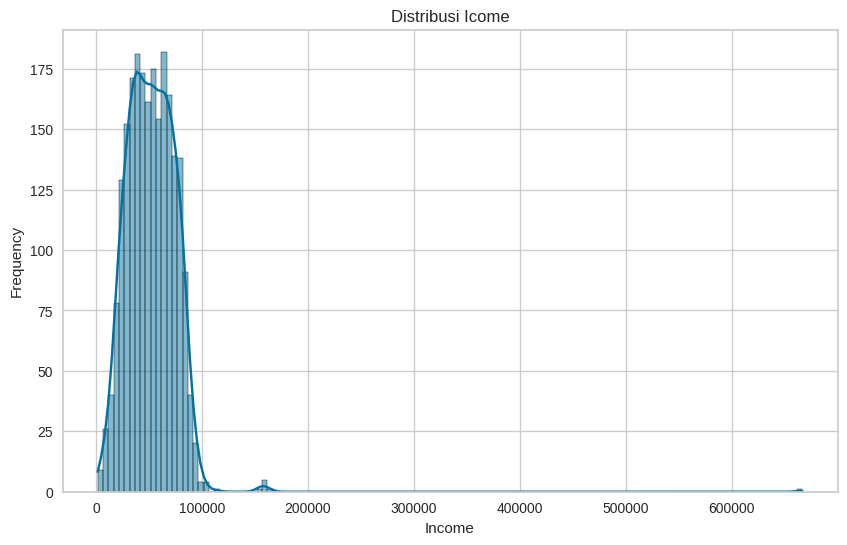

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Distribusi Icome')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

**Apa yang bisa kita lihat dari grafik ini?**

* **Sebagian besar orang memiliki pendapatan di bawah 100.000**. Kita bisa lihat batang-batang grafik paling tinggi berada di sekitar angka 100.000. Ini artinya, banyak sekali orang yang pendapatannya berada di kisaran ini.
* **Semakin tinggi pendapatan, jumlah orangnya semakin sedikit**. Semakin ke kanan kita lihat, batang-batang grafiknya semakin pendek. Ini menunjukkan bahwa semakin tinggi pendapatan, jumlah orang yang memiliki pendapatan tersebut semakin sedikit.
* **Distribusi pendapatannya tidak merata**. Bentuk grafiknya agak condong ke kanan (disebut *skewed to the right*). Ini artinya, ada beberapa orang dengan pendapatan yang sangat tinggi dibandingkan dengan mayoritas lainnya.

**Apa artinya ini?**

Grafik ini menunjukkan bahwa kebanyakan orang memiliki pendapatan yang relatif rendah, sementara hanya sedikit orang yang memiliki pendapatan yang sangat tinggi. Ini adalah situasi yang cukup umum terjadi di banyak negara, di mana kesenjangan pendapatan antara kelompok kaya dan miskin cukup besar.

**Apa yang bisa kita lakukan dengan informasi ini?**

**Informasi ini bisa berguna untuk:**

**Membuat kebijakan**: Pemerintah bisa menggunakan data ini untuk membuat kebijakan yang lebih baik, misalnya untuk mengurangi kesenjangan pendapatan atau meningkatkan taraf hidup masyarakat berpenghasilan rendah.
**Membuat strategi bisnis**: Perusahaan bisa menggunakan data ini untuk menentukan target pasar mereka. Misalnya, jika ingin menargetkan konsumen dengan daya beli tinggi, maka perusahaan bisa fokus pada segmen pasar dengan pendapatan di atas rata-rata.
**Riset lebih lanjut**: Data ini bisa menjadi titik awal untuk penelitian lebih lanjut, misalnya untuk mengetahui faktor-faktor apa saja yang mempengaruhi distribusi pendapatan.




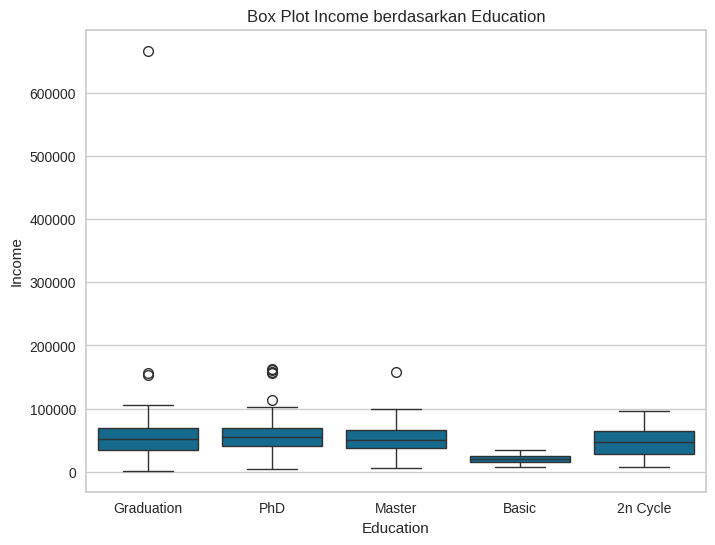

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Income', data=df)  # Ganti kolom sesuai kebutuhan
plt.title('Box Plot Income berdasarkan Education')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

**Mari kita bedah grafik box plot ini bersama.**

Grafik ini menunjukkan hubungan antara tingkat pendidikan (`Education`) dengan pendapatan (`Income`).

**Apa yang bisa kita baca dari grafik ini?**

* **Median Pendapatan**: Garis tengah pada setiap kotak mewakili median pendapatan untuk setiap tingkat pendidikan. Semakin tinggi garis median, semakin tinggi pula pendapatan rata-rata untuk kelompok tersebut.
* **Rentang Antar-kuartil (*IQR*)**: Kotak pada setiap kategori menunjukkan rentang antara kuartil pertama (25%) dan kuartil ketiga (75%). Semakin lebar kotak, semakin besar variasi pendapatan dalam kelompok tersebut.
* **Kuartil 1 dan 3**: Batas bawah dan atas kotak masing-masing mewakili kuartil pertama dan ketiga. Ini berarti 50% dari data berada di dalam kotak tersebut.
* **Kumis**: Garis-garis yang memanjang dari kotak mewakili rentang data yang masih dianggap wajar. Data yang berada di luar kumis (titik-titik kosong) dianggap sebagai outlier atau data ekstrem.
* **Outlier**: Titik-titik kosong di luar kumis menunjukkan adanya individu dengan pendapatan yang jauh lebih tinggi atau lebih rendah dibandingkan dengan kelompoknya.
Kesimpulan dari Grafik

Secara umum, grafik ini menunjukkan tren **positif** antara tingkat pendidikan dan pendapatan. Individu dengan tingkat pendidikan yang lebih tinggi cenderung memiliki pendapatan yang lebih tinggi pula.

* **PhD dan Master**: Kedua kelompok ini memiliki median pendapatan yang paling tinggi, menunjukkan bahwa pendidikan pascasarjana memberikan keuntungan yang signifikan dalam hal pendapatan.
* **Graduation**: Kelompok lulusan S1 memiliki pendapatan yang cukup baik, namun terdapat variasi yang cukup besar.
* **Basic dan 2n Cycle**: Kedua kelompok ini memiliki median pendapatan yang lebih rendah dibandingkan dengan kelompok lainnya. Ini menunjukkan bahwa pendidikan dasar dan menengah tidak cukup untuk menjamin pendapatan yang tinggi.

**Namun, perlu diingat beberapa hal:**

* **Adanya Outlier**: Keberadaan outlier menunjukkan bahwa faktor lain selain pendidikan juga dapat mempengaruhi pendapatan seseorang, seperti pengalaman kerja, jenis pekerjaan, dan faktor ekonomi lainnya.
* **Generalisasi**: Grafik ini hanya menunjukkan tren umum. Tidak semua individu dengan pendidikan tinggi akan memiliki pendapatan yang tinggi, dan begitu pula sebaliknya.

**3. Analisis Korelasi**



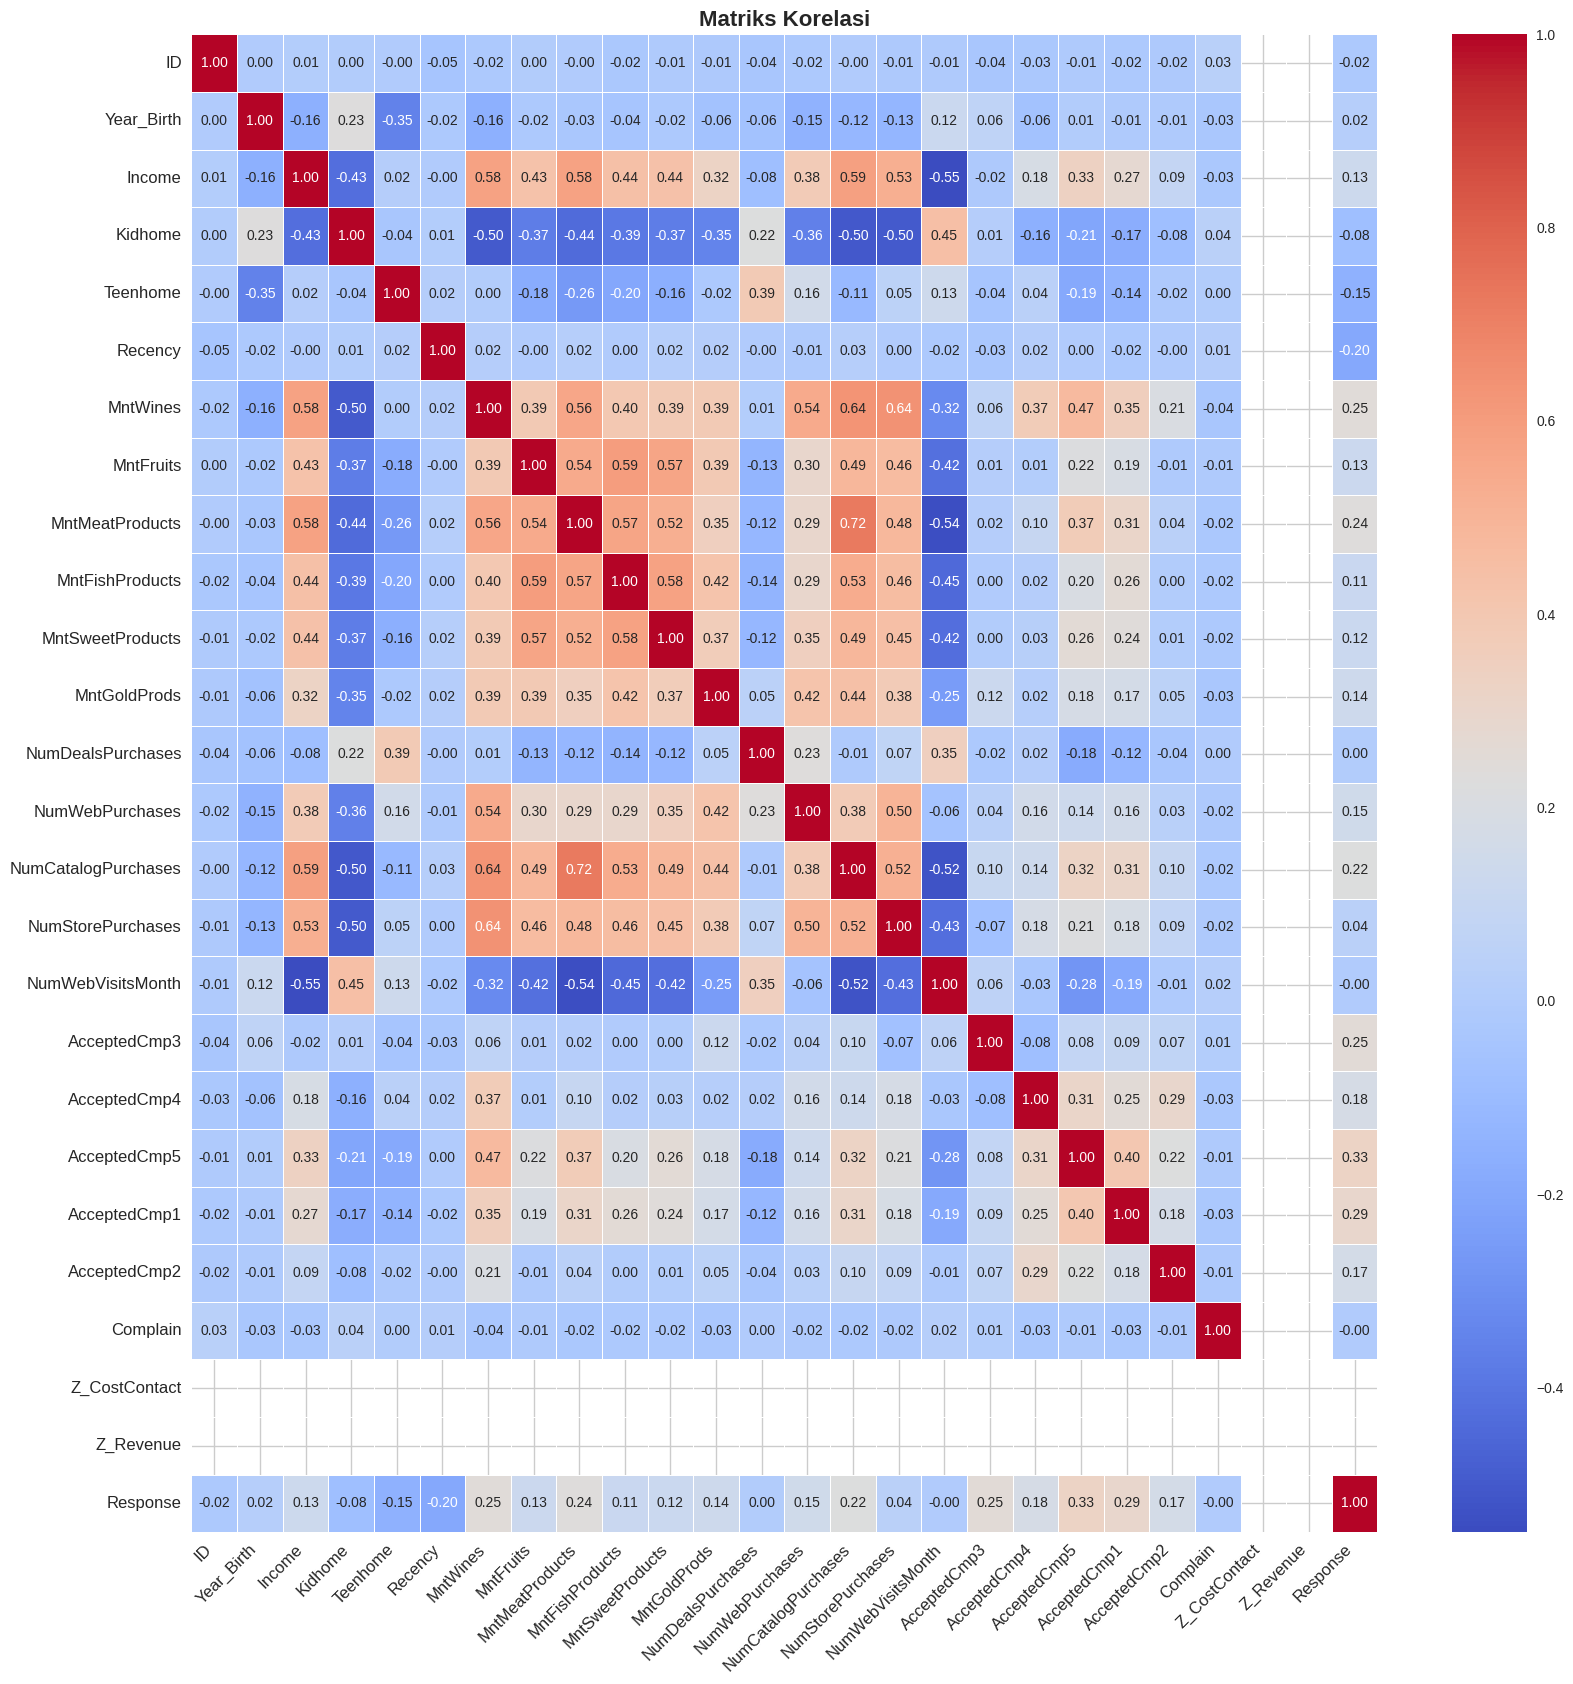

In [50]:
# Analisis Korelasi
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Percantik Heatmap
plt.figure(figsize=(17, 17))  # Sesuaikan ukuran figure agar lebih proporsional
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",  # Menampilkan 2 angka di belakang koma
    linewidths=0.5,  # Menambahkan garis di antara sel
    linecolor='white',  # Mengatur warna garis
    annot_kws={"size": 10}  # Mengatur ukuran font anotasi
)

plt.title('Matriks Korelasi', fontsize=16, fontweight='bold')  # Percantik judul
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotasi label sumbu x
plt.yticks(fontsize=12)  # Atur ukuran font label sumbu y

plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()

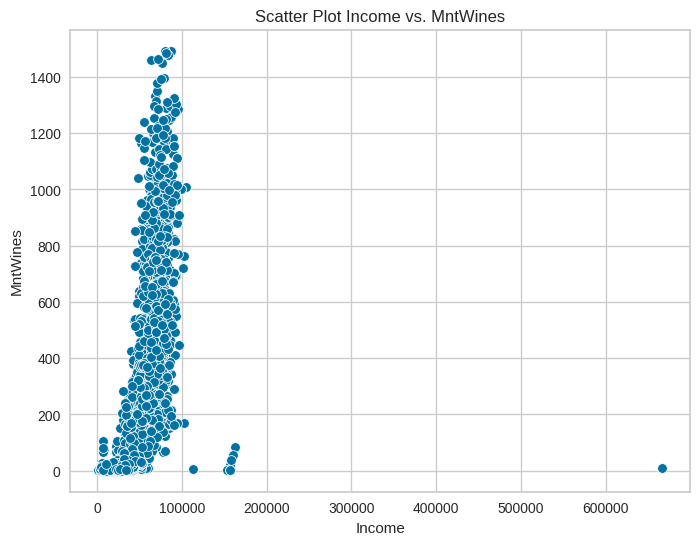

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntWines', data=df)  # Ganti kolom sesuai kebutuhan
plt.title('Scatter Plot Income vs. MntWines')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.